<a href="https://colab.research.google.com/github/MathewBiddle/HackingLimno2025/blob/main/WOA_THREDDS_Access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install cftime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 46.7 MB/s eta 0:00:00


In [14]:
import xarray as xr
import pandas as pd


In [25]:
url = 'https://www.ncei.noaa.gov/thredds-ocean/fileServer/regional-climatologies/gulf-of-mexico/DATA/temperature/netcdf/decav/0.10/gom_decav_t00_10.nc'

ds = xr.open_dataset(url, decode_times=False)
units, reference_date = ds.time.attrs['units'].split('since')
ds['time'] = pd.date_range(start=reference_date, periods=ds.sizes['time'], freq='MS')

ds

<xarray.Dataset> Size: 139MB
Dimensions:             (lat: 171, nbounds: 2, lon: 221, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 684B 18.05 18.15 18.25 ... 34.95 35.05
  * lon                 (lon) float32 884B -97.95 -97.85 ... -76.05 -75.95
  * depth               (depth) float32 408B 0.0 5.0 10.0 ... 5.4e+03 5.5e+03
  * time                (time) datetime64[ns] 8B 1955-01-01
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 4B ...
    lat_bnds            (lat, nbounds) float32 1kB ...
    lon_bnds            (lon, nbounds) float32 2kB ...
    depth_bnds          (depth, nbounds) float32 816B ...
    climatology_bounds  (time, nbounds) float32 8B ...
    t_an                (time, depth, lat, lon) float32 15MB ...
    t_mn                (time, depth, lat, lon) float32 15MB ...
    t_dd                (time, depth, lat, lon) float64 31MB ...
    t_sd                (time, depth, lat, lon) float32 15MB ...
    t_se                (time, depth, lat, lon) float32 15MB ...
    t_oa                (time, depth, lat, lon) float32 15MB ...
    t_gp                (time, depth, lat, lon) float64 31MB ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Gulf of Mexico regional climatology : se...
    summary:                         Climatological mean temperature for the ...
    references:                       Seidov, D., A.V. Mishonov, T.P. Boyer, ...
    institution:                     National Centers for Environmental Infor...
    comment:                         Regional Climatology as part of the Worl...
    ...                              ...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/regional-ocean...
    date_created:                    2020-05-18 
    date_modified:                   2020-05-18

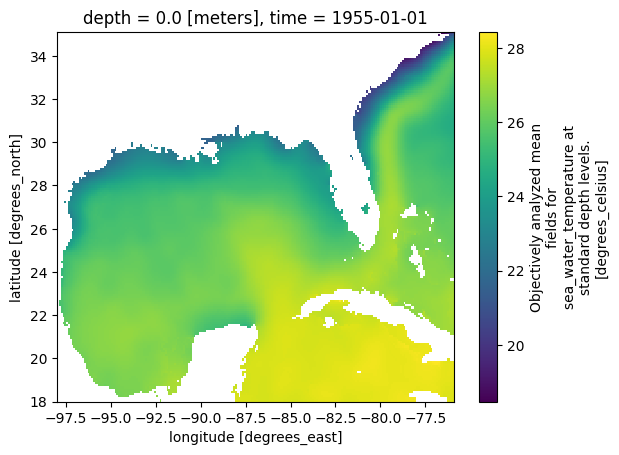

In [23]:
ds['t_an'].sel(time='2003-01-1', depth=0, method='nearest').plot()

In [ ]:
ds['t_an'].sel(time='2003-01', depth=0, method='nearest').plot()